1. Problem Statement

The goal is to build a predictive model that estimates product sales based on key features like views, pricing, and category. This is a regression problem since the target variable (sales) is continuous

2. Hypothesis Generation

Generate hypotheses about how each feature (views, pricing, category) might influence product sales:

Higher views could lead to increased sales due to greater exposure.
Competitive pricing relative to cost might lead to higher sales.
Certain product categories may be more popular and hence drive more sales.

3. Getting the system ready and loading the data

In [22]:
# Supress warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)


import pandas as pd
import numpy as np
import skimpy 

df = pd.read_csv('../data/sales.csv')


4. Understanding the data

In [23]:
df.head()

,date,id,category_id,sales,views,price_cost,price_retail
0,2022-02-24,1,3,0,0,0,0
1,2022-02-25,1,3,0,0,0,0
2,2022-02-26,1,3,0,0,0,0
3,2022-02-27,1,3,0,0,0,0
4,2022-02-28,1,3,0,0,0,0


In [24]:
df.shape

(2548824, 7)

In [25]:
df.describe()

,id,category_id,sales,views,price_cost,price_retail
count,2.548824e+06,2.548824e+06,2.548824e+06,2.548824e+06,2.548824e+06,2.548824e+06
mean,1.741500e+03,1.590752e+00,3.706074e-01,3.825130e+01,1.219318e+04,1.768616e+04
std,1.005167e+03,6.505913e-01,5.039799e+00,1.824299e+02,1.858160e+04,2.641387e+04
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.710000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.741500e+03,2.000000e+00,0.000000e+00,8.000000e+00,3.546000e+03,7.582000e+03
75%,2.612000e+03,2.000000e+00,0.000000e+00,3.300000e+01,1.814800e+04,2.580000e+04
max,3.482000e+03,4.000000e+00,1.372000e+03,4.314800e+04,2.925730e+05,7.590770e+05


The dataset contains a mix of numerical and categorical variables representing various attributes of loan applicants and their loan applications. The dataset appears to be suitable for analyzing factors influencing the sales price of a item compared to the retail price the views that they had for different items and categories.


In [26]:
# Assessing data quality, completeness, and relevance
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2548824 entries, 0 to 2548823
Data columns (total 7 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   date          object
 1   id            int64 
 2   category_id   int64 
 3   sales         int64 
 4   views         int64 
 5   price_cost    int64 
 6   price_retail  int64 
dtypes: int64(6), object(1)
memory usage: 136.1+ MB


In [27]:
df['date'] = pd.to_datetime(df['date'])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2548824 entries, 0 to 2548823
Data columns (total 7 columns):
 #   Column        Dtype         
---  ------        -----         
 0   date          datetime64[ns]
 1   id            int64         
 2   category_id   int64         
 3   sales         int64         
 4   views         int64         
 5   price_cost    int64         
 6   price_retail  int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 136.1 MB


In [29]:
df.isnull().sum()

date            0
id              0
category_id     0
sales           0
views           0
price_cost      0
price_retail    0
dtype: int64

In [30]:
df['id'].nunique()

3482

In [31]:
df['id'].value_counts()

id
1       732
2326    732
2315    732
2316    732
2317    732
       ... 
1165    732
1166    732
1167    732
1168    732
3482    732
Name: count, Length: 3482, dtype: int64

In [32]:
df['category_id'].nunique()

4

In [33]:
df.groupby('id')['category_id'].nunique()

id
1       1
2       1
3       1
4       1
5       1
       ..
3478    1
3479    1
3480    1
3481    1
3482    1
Name: category_id, Length: 3482, dtype: int64

- The dataset contains ... entries (rows) and ... columns.
- Each column represents a different variable or feature.
- The variables have different data types:
- ... columns are of type float64, representing numerical variables (e.g., CoapplicantIncome, LoanAmount).
- ... column is of type int64, representing a numerical variable (e.g., ApplicantIncome).
- ... columns are of type object, representing categorical variables (e.g., Gender, Married, Education).
- ... are missing values in several columns:
Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, and Credit_History have some missing values.
- The target variable (Loan_Status) is categorical and has two classes: Y (Yes) and N (No).
- Other categorical variables include Gender, Married, Education, Self_Employed, and Property_Area.
- Numerical variables include ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, and Credit_History.

In [34]:
#Identifying potential data issues and limitations.
from skimpy import skim
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                 Data Types                                                                │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                         │
│ ┃ dataframe         ┃ Values  ┃ ┃ Column Type ┃ Count ┃                                                         │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                         │
│ │ Number of rows    │ 2548824 │ │ int32       │ 6     │                                                         │
│ │ Number of columns │ 7       │ │ datetime64  │ 1     │                                                         │
│ └───────────────────┴─────────┘ └─────────────┴───────┘                                                         │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %   ┃ mean    ┃ sd      ┃ p0  ┃ p25   ┃ p50    ┃ p75     ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ id                │    0 │      0 │    1700 │    1000 │   1 │   870 │   1700 │    2600 │    3500 │ ▇▇▇▇▇▇  │  │
│ │ category_id       │    0 │      0 │     1.6 │    0.65 │   1 │     1 │      2 │       2 │       4 │  ▇ ▇ ▁  │  │
│ │ sales             │    0 │      0 │    0.37 │       5 │   0 │     0 │      0 │       0 │    1400 │    ▇    │  │
│ │ views             │    0 │      0 │      38 │     180 │   0 │     0 │      8 │      33 │   43000 │    ▇    │  │
│ │ price_cost        │    0 │      0 │   12000 │   19000 │   0 │     0 │   3500 │   18000 │  290000 │    ▇    │  │
│ │ price_retail      │    0 │      0 │   18000 │   26000 │   0 │     0 │   7600 │   26000 │  760000 │    ▇    │  │
│ └───────────────────┴──────┴────────┴─────────┴─────────┴─────┴───────┴────────┴─────────┴─────────┴─────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA     ┃ NA %      ┃ first               ┃ last                ┃ frequency        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩  │
│ │ date                   │      0 │         0 │     2022-02-24      │     2024-02-25      │ None             │  │
│ └────────────────────────┴────────┴───────────┴─────────────────────┴─────────────────────┴──────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

5. Exploratory Data Analysis

In [35]:
# For Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sn
import pandas as pd

 	i. Perform Univariate Analysis

In [36]:
df.describe()

,date,id,category_id,sales,views,price_cost,price_retail
count,2548824,2.548824e+06,2.548824e+06,2.548824e+06,2.548824e+06,2.548824e+06,2.548824e+06
mean,2023-02-24 12:00:00.000000512,1.741500e+03,1.590752e+00,3.706074e-01,3.825130e+01,1.219318e+04,1.768616e+04
min,2022-02-24 00:00:00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2022-08-25 18:00:00,8.710000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2023-02-24 12:00:00,1.741500e+03,2.000000e+00,0.000000e+00,8.000000e+00,3.546000e+03,7.582000e+03
75%,2023-08-26 06:00:00,2.612000e+03,2.000000e+00,0.000000e+00,3.300000e+01,1.814800e+04,2.580000e+04
max,2024-02-25 00:00:00,3.482000e+03,4.000000e+00,1.372000e+03,4.314800e+04,2.925730e+05,7.590770e+05
std,NaN,1.005167e+03,6.505913e-01,5.039799e+00,1.824299e+02,1.858160e+04,2.641387e+04


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2548824 entries, 0 to 2548823
Data columns (total 7 columns):
 #   Column        Dtype         
---  ------        -----         
 0   date          datetime64[ns]
 1   id            int64         
 2   category_id   int64         
 3   sales         int64         
 4   views         int64         
 5   price_cost    int64         
 6   price_retail  int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 136.1 MB


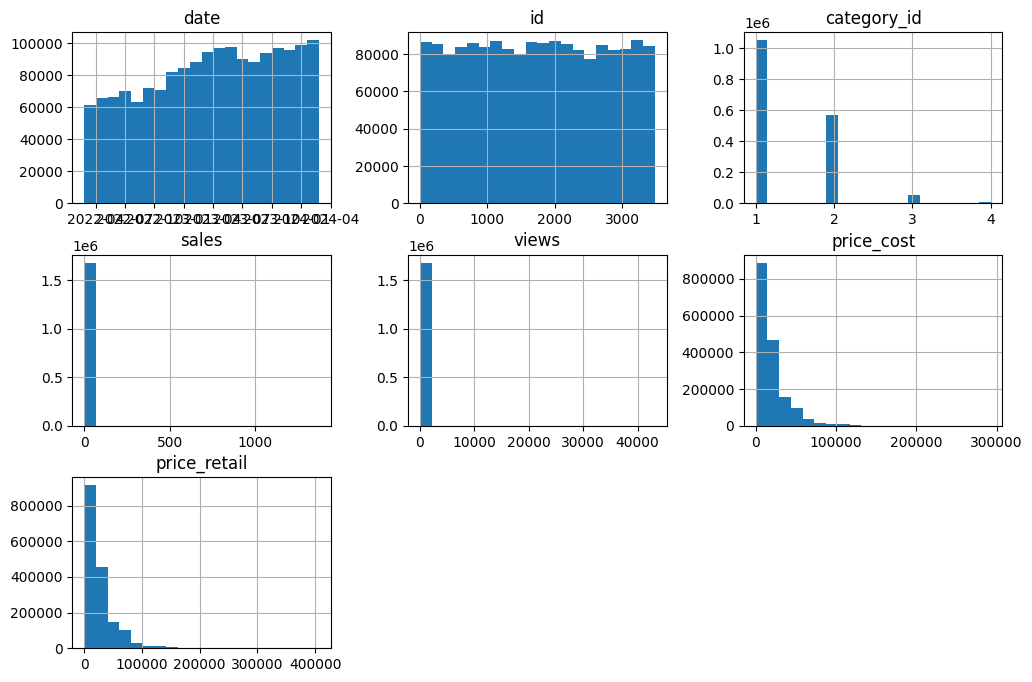

In [49]:
import matplotlib.pyplot as plt
df.hist(bins=20, figsize=(12, 8))
plt.show()

 	ii. Perform Bivariate Analysis

In [39]:
df.corr()

,date,id,category_id,sales,views,price_cost,price_retail
date,1.000000e+00,-4.335170e-12,-3.469690e-14,0.003500,0.004143,0.061553,0.012283
id,-4.335170e-12,1.000000e+00,5.741826e-03,-0.005177,-0.004533,-0.014041,-0.012849
category_id,-3.469690e-14,5.741826e-03,1.000000e+00,0.039944,-0.016035,-0.444198,-0.448903
sales,3.500142e-03,-5.177311e-03,3.994367e-02,1.000000,0.132817,-0.033488,-0.035329
views,4.143114e-03,-4.532785e-03,-1.603521e-02,0.132817,1.000000,0.031206,0.020919
price_cost,6.155335e-02,-1.404127e-02,-4.441977e-01,-0.033488,0.031206,1.000000,0.933531
price_retail,1.228250e-02,-1.284860e-02,-4.489032e-01,-0.035329,0.020919,0.933531,1.000000


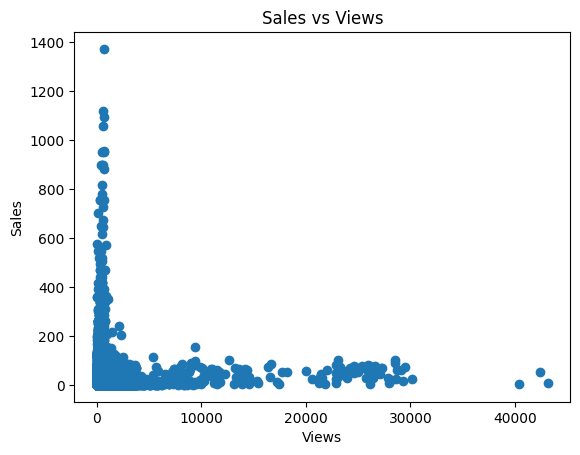

In [40]:
plt.scatter(df['views'], df['sales'])
plt.xlabel('Views')
plt.ylabel('Sales')
plt.title('Sales vs Views')
plt.show()

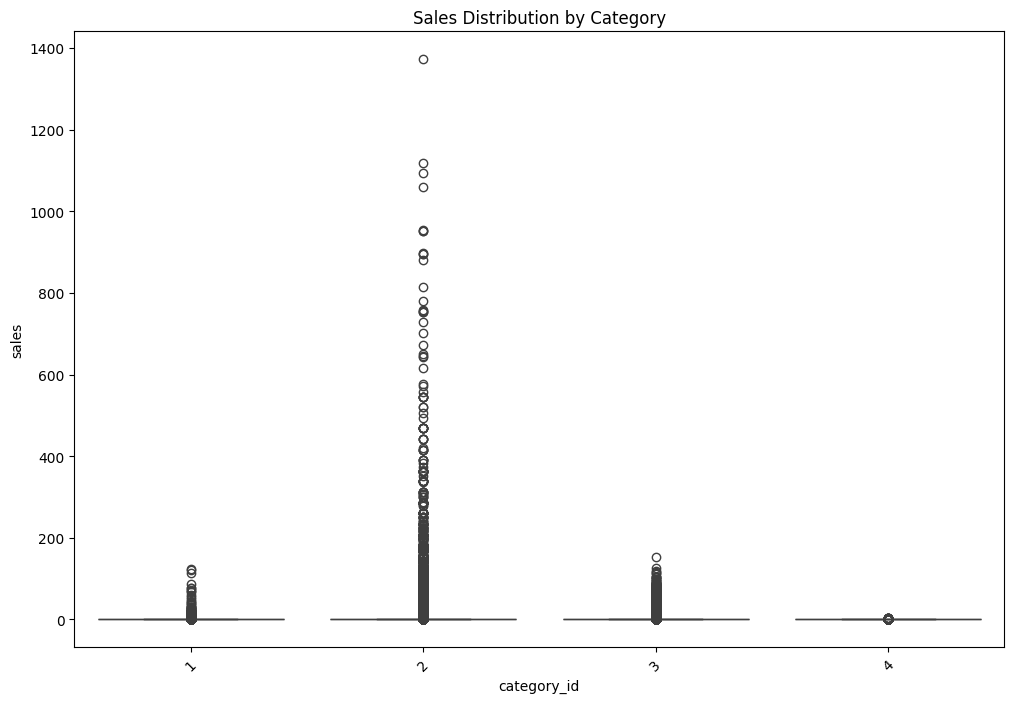

In [41]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.boxplot(x='category_id', y='sales', data=df)
plt.xticks(rotation=45)
plt.title('Sales Distribution by Category')
plt.show()

6. Missing value and outlier treatment

Any variation of data that is not applicable or any strange characters we will replace the data with null values

In [42]:
df.isnull().sum()

date            0
id              0
category_id     0
sales           0
views           0
price_cost      0
price_retail    0
dtype: int64

In [44]:
df = df[(df['price_cost']!=0)]

C:\Users\jandr\AppData\Local\Temp\ipykernel_34724\2053503679.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['id']==1][['views']])


<Axes: ylabel='Density'>

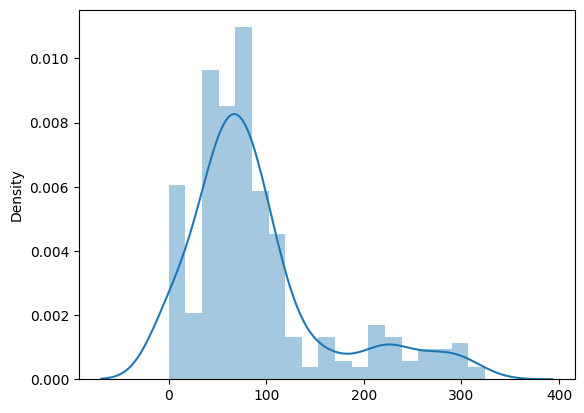

In [46]:
import seaborn as sns
sns.distplot(df[df['id']==1][['views']])

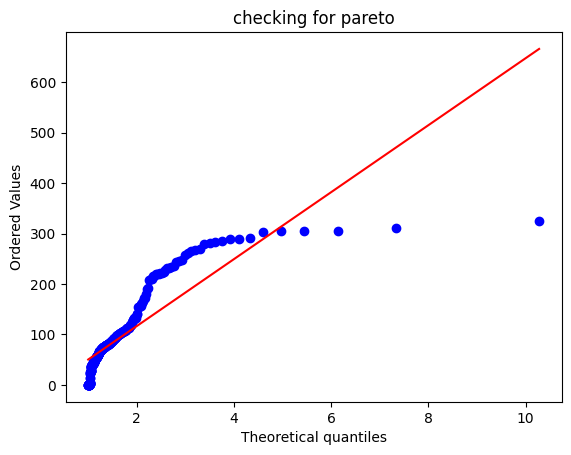

In [48]:
import scipy.stats as stats
column_data = df[df['id'] == 1]['views'] 
stats.probplot(column_data, dist='pareto', sparams=(2.62), plot=plt)
plt.title("checking for pareto")
plt.show()

In [ ]:
df = pd.get_dummies(df, columns=['category_id'], prefix='category')

7. Evaluation Metrics for classification problem

8. Model building: part 1 (Apply Deep Learning classification algorithm without step 9)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import mglearn
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge





In [ ]:
# Assuming Sales_df is your DataFrame and 'Sales' is the column to be imputed
Sales_df = df[['sales']]

# Impute missing values using the mean strategy
imp_num = SimpleImputer(strategy='mean')
loan_df_imputed = pd.DataFrame(
    imp_num.fit_transform(Sales_df),  # Impute missing values
    columns=Sales_df.columns  # Keep the original column name
)

# Assign the imputed values back to the original DataFrame
df['sales'] = loan_df_imputed['sales']


# check missing values in %age
missing_values = (
    df.isnull().sum()/len(df)*100
).astype(int)

print(f'Column\t\t\t% missing')
print(f'{"-"}'*35)
missing_values

9. Feature engineering

10. Model building: part 2 (Apply Deep Learning classification algorithm with step 9)

11. Model deployment - Dash app on https://www.render.com